In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', palette='deep')
width=0.35
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# from https://www.kaggle.com/code/vinicius150987/regression-boston-sklearn-dataset/notebook

In [172]:
#Importing dataset
#from sklearn.datasets import load_california # no longer available
from sklearn.datasets import fetch_california_housing as load_california
california = load_california()

for i in np.arange(len(california)):
    print(list(california.keys())[i])

data = np.c_[california['data'], california['target']]
columns = np.append(california['feature_names'], 'MEDV')

df= pd.DataFrame(data, columns= columns)
df.head()

data
target
frame
target_names
feature_names
DESCR


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [149]:
columns

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MEDV'], dtype='<U10')

In [150]:
features = columns

In [151]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [152]:
# view data imported
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [153]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

In [154]:
california['DESCR'][
        california['DESCR'].find(df.columns[0]):california['DESCR'].find(df.columns[0])+
        len(df.columns[0])]

'MedInc'

In [155]:
#Finding the meaning of the columns
#california['DESCR'][
#        california['DESCR'].find(df.columns[0]):california['DESCR'].find(df.columns[0])+
#        len(df.columns[0])]

text_list = california['DESCR'].split('\n') #split() method splits a string into a list

for i in np.arange(len(text_list)):
    print(i, text_list[i]) # takes list and numbers each row so we can match description counts for next call

#text_list = text_list[12:25] # this is why we don't hard code rows!
#original california data set the descriptions were in rows 12 thru 25
#11     :Attribute Information (in order):
#12         - CRIM     per capita crime rate by town
#13         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#14         - INDUS    proportion of non-retail business acres per town
#15         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#16         - NOX      nitric oxides concentration (parts per 10 million)
#17         - RM       average number of rooms per dwelling
#18         - AGE      proportion of owner-occupied units built prior to 1940
#19         - DIS      weighted distances to five california employment centres
#20         - RAD      index of accessibility to radial highways
#21         - TAX      full-value property-tax rate per $10,000
#22         - PTRATIO  pupil-teacher ratio by town
#23         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#24         - LSTAT    % lower status of the population
#25         - MEDV     Median value of owner-occupied homes in $1000's

#California dataset is
#11     :Attribute Information:
#12         - MedInc        median income in block group
#13         - HouseAge      median house age in block group
#14         - AveRooms      average number of rooms per household
#15         - AveBedrms     average number of bedrooms per household
#16         - Population    block group population
#17         - AveOccup      average number of household members
#18         - Latitude      block group latitude
#19         - Longitude     block group longitude

text_list = text_list[12:20] # grabs the specific rows for the descriptions
text_list = [text_list[i].strip('- ') for i in np.arange(len(text_list))] # strips off the leading '-' character
#text_list = [text_list[i].strip(df.columns[i]).strip() for i in np.arange(len(text_list))] # fails since the variable name is in the description

# remove the number of characters equal to the length of variable name then strip spaces
text_list = [text_list[i][len(df.columns[i]):].strip() for i in np.arange(len(text_list))]


columns_meaning = pd.DataFrame(text_list, index=california['feature_names'], columns=['Description'])
target_meaning = pd.DataFrame(["Median value of owner-occupied homes in $1000's"], index=['MEDV'],columns=['Description'])
columns_meaning = pd.concat([columns_meaning,target_meaning])
columns_meaning

0 .. _california_housing_dataset:
1 
2 California Housing dataset
3 --------------------------
4 
5 **Data Set Characteristics:**
6 
7     :Number of Instances: 20640
8 
9     :Number of Attributes: 8 numeric, predictive attributes and the target
10 
11     :Attribute Information:
12         - MedInc        median income in block group
13         - HouseAge      median house age in block group
14         - AveRooms      average number of rooms per household
15         - AveBedrms     average number of bedrooms per household
16         - Population    block group population
17         - AveOccup      average number of household members
18         - Latitude      block group latitude
19         - Longitude     block group longitude
20 
21     :Missing Attribute Values: None
22 
23 This dataset was obtained from the StatLib repository.
24 https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
25 
26 The target variable is the median house value for California districts,
27 expressed

,Description
MedInc,median income in block group
HouseAge,median house age in block group
AveRooms,average number of rooms per household
AveBedrms,average number of bedrooms per household
Population,block group population
AveOccup,average number of household members
Latitude,block group latitude
Longitude,block group longitude
MEDV,Median value of owner-occupied homes in $1000's


In [156]:
#Looking for null values
null_values = (df.isnull().sum()/len(df))*100
null_values = pd.DataFrame(null_values, columns=['% of Null Values'])
null_values

,% of Null Values
MedInc,0.0
HouseAge,0.0
AveRooms,0.0
AveBedrms,0.0
Population,0.0
AveOccup,0.0
Latitude,0.0
Longitude,0.0
MEDV,0.0


In [157]:
#The maximum and minimum values by columns
describe = df.describe().loc[['min','max']]
describe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
min,0.4999,1.0,0.846154,0.333333,3.0,0.692308,32.54,-124.35,0.14999
max,15.0001,52.0,141.909091,34.066667,35682.0,1243.333333,41.95,-114.31,5.00001


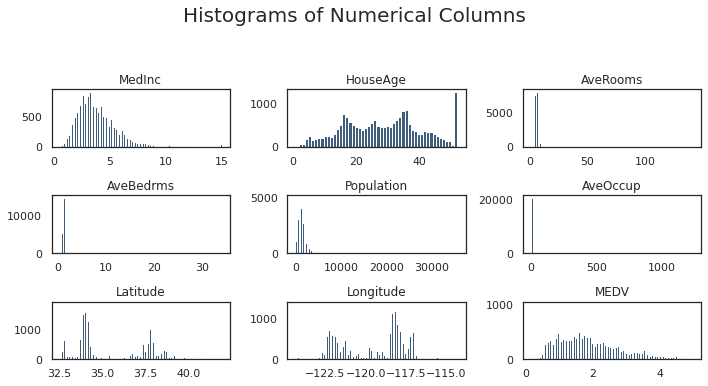

In [158]:
## Histograms
df2 = df.loc[:,features]

fig = plt.figure(figsize=(10, 10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [173]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

<Axes: title={'center': 'Correlation with MEDV'}>

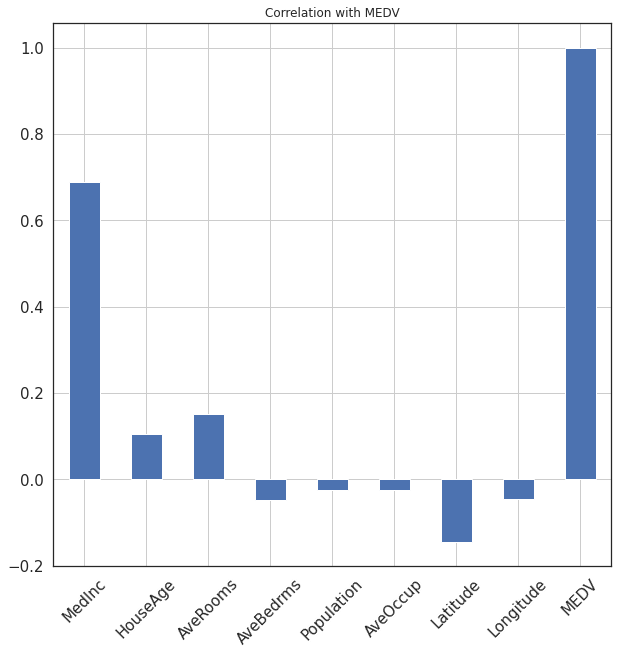

In [159]:
## Correlation with independent Variable (Note: Models like RF are not linear like these)
df.columns
df2.corrwith(df['MEDV']).plot.bar(
        figsize = (10, 10), title = "Correlation with MEDV", fontsize = 15,
        rot = 45, grid = True)

In [160]:
#Define X and y
X = df.loc[:,california['feature_names']]
y = df.loc[:,'MEDV']

In [161]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [162]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

In [163]:
#### Model Building ####
### Comparing Models

## Multiple Linear Regression Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [164]:
## Polynomial Regressor
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting Test Set
y_pred = regressor.predict(poly_reg.fit_transform(X_test))
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Polynomial Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [165]:
## Suport Vector Regression 
'Necessary Standard Scaler '
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Support Vector RBF', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [166]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [167]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train,y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [168]:
## Ada Boosting
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['AdaBoost Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [169]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoosting Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [170]:
##Xg Boosting
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['XGB Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [171]:
#The best model
results.sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2 Score
7,XGB Regressor,0.309966,0.213694,0.462270,0.836119
4,Random Forest Regression,0.334097,0.261104,0.510983,0.799760
6,GradientBoosting Regressor,0.374173,0.290408,0.538895,0.777287
2,Support Vector RBF,0.385567,0.330914,0.575252,0.746222
0,Multiple Linear Regression,0.535126,0.528984,0.727313,0.594323
3,Decision Tree Regression,0.468968,0.532076,0.729436,0.591952
5,AdaBoost Regressor,0.643211,0.604485,0.777486,0.536422
1,Polynomial Regression,0.488041,2.763846,1.662482,-1.119587
